In [1]:
#import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import seaborn as sns
%matplotlib inline

In [2]:
#load survey_results_public.csv in dataframe
df=pd.read_csv('survey_results_public.csv')
df.head()

,Respondent,Professional,ProgramHobby,Country,University,EmploymentStatus,FormalEducation,MajorUndergrad,HomeRemote,CompanySize,...,StackOverflowMakeMoney,Gender,HighestEducationParents,Race,SurveyLong,QuestionsInteresting,QuestionsConfusing,InterestedAnswers,Salary,ExpectedSalary
0,1,Student,"Yes, both",United States,No,"Not employed, and not looking for work",Secondary school,NaN,NaN,NaN,...,Strongly disagree,Male,High school,White or of European descent,Strongly disagree,Strongly agree,Disagree,Strongly agree,NaN,NaN
1,2,Student,"Yes, both",United Kingdom,"Yes, full-time",Employed part-time,Some college/university study without earning ...,Computer science or software engineering,"More than half, but not all, the time",20 to 99 employees,...,Strongly disagree,Male,A master's degree,White or of European descent,Somewhat agree,Somewhat agree,Disagree,Strongly agree,NaN,37500.0
2,3,Professional developer,"Yes, both",United Kingdom,No,Employed full-time,Bachelor's degree,Computer science or software engineering,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A professional degree,White or of European descent,Somewhat agree,Agree,Disagree,Agree,113750.0,NaN
3,4,Professional non-developer who sometimes write...,"Yes, both",United States,No,Employed full-time,Doctoral degree,A non-computer-focused engineering discipline,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A doctoral degree,White or of European descent,Agree,Agree,Somewhat agree,Strongly agree,NaN,NaN
4,5,Professional developer,"Yes, I program as a hobby",Switzerland,No,Employed full-time,Master's degree,Computer science or software engineering,Never,10 to 19 employees,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df.shape

(51392, 154)

The data set contains 51392 lines of data.

In [4]:
df.groupby(['HomeRemote']).count()

,Respondent,Professional,ProgramHobby,Country,University,EmploymentStatus,FormalEducation,MajorUndergrad,CompanySize,CompanyType,...,StackOverflowMakeMoney,Gender,HighestEducationParents,Race,SurveyLong,QuestionsInteresting,QuestionsConfusing,InterestedAnswers,Salary,ExpectedSalary
HomeRemote,,,,,,,,,,,,,,,,,,,,,
A few days each month,15454,15454,15454,15454,15454,15454,15454,14237,14644,14618,...,9779,10992,10965,10388,10876,10825,10797,10852,5107,221
About half the time,1769,1769,1769,1769,1769,1769,1769,1499,1331,1327,...,991,1107,1105,1028,1093,1090,1085,1094,335,80
All or almost all the time (I'm full-time remote),4905,4905,4905,4905,4905,4905,4905,4081,2596,2587,...,3237,3581,3581,3384,3572,3551,3538,3553,905,169
It's complicated,1849,1849,1849,1849,1849,1849,1849,1640,1708,1706,...,1327,1479,1476,1399,1468,1469,1458,1465,647,43
"Less than half the time, but at least one day each week",4147,4147,4147,4147,4147,4147,4147,3765,3717,3709,...,2671,2994,2986,2824,2970,2959,2954,2967,1263,85
"More than half, but not all, the time",1909,1909,1909,1909,1909,1909,1909,1608,1268,1263,...,1088,1259,1249,1181,1239,1232,1228,1231,329,84
Never,13975,13975,13975,13975,13975,13975,13975,12427,13606,13568,...,8433,9558,9539,9028,9451,9381,9340,9407,4297,450


In [5]:
#Drop na Rows of HomeRemote
df = df.dropna(subset=['HomeRemote'], axis=0) 

In [6]:
df.shape

(44008, 154)

Since I would like to analyse the use and the connection with home office, I can only use a maximum of 44008 data lines for the analysis, since there is no information on Home Remote in approx. 7000 data lines.

In [7]:
df.groupby(['HomeRemote']).count()

,Respondent,Professional,ProgramHobby,Country,University,EmploymentStatus,FormalEducation,MajorUndergrad,CompanySize,CompanyType,...,StackOverflowMakeMoney,Gender,HighestEducationParents,Race,SurveyLong,QuestionsInteresting,QuestionsConfusing,InterestedAnswers,Salary,ExpectedSalary
HomeRemote,,,,,,,,,,,,,,,,,,,,,
A few days each month,15454,15454,15454,15454,15454,15454,15454,14237,14644,14618,...,9779,10992,10965,10388,10876,10825,10797,10852,5107,221
About half the time,1769,1769,1769,1769,1769,1769,1769,1499,1331,1327,...,991,1107,1105,1028,1093,1090,1085,1094,335,80
All or almost all the time (I'm full-time remote),4905,4905,4905,4905,4905,4905,4905,4081,2596,2587,...,3237,3581,3581,3384,3572,3551,3538,3553,905,169
It's complicated,1849,1849,1849,1849,1849,1849,1849,1640,1708,1706,...,1327,1479,1476,1399,1468,1469,1458,1465,647,43
"Less than half the time, but at least one day each week",4147,4147,4147,4147,4147,4147,4147,3765,3717,3709,...,2671,2994,2986,2824,2970,2959,2954,2967,1263,85
"More than half, but not all, the time",1909,1909,1909,1909,1909,1909,1909,1608,1268,1263,...,1088,1259,1249,1181,1239,1232,1228,1231,329,84
Never,13975,13975,13975,13975,13975,13975,13975,12427,13606,13568,...,8433,9558,9539,9028,9451,9381,9340,9407,4297,450


### Question 1: When do people work in the HomeOffice?

In [8]:
#https://www.delftstack.com/de/howto/python-pandas/pandas-groupby-count-python/

df['HomeRemote'].value_counts()

A few days each month                                      15454
Never                                                      13975
All or almost all the time (I'm full-time remote)           4905
Less than half the time, but at least one day each week     4147
More than half, but not all, the time                       1909
It's complicated                                            1849
About half the time                                         1769
Name: HomeRemote, dtype: int64

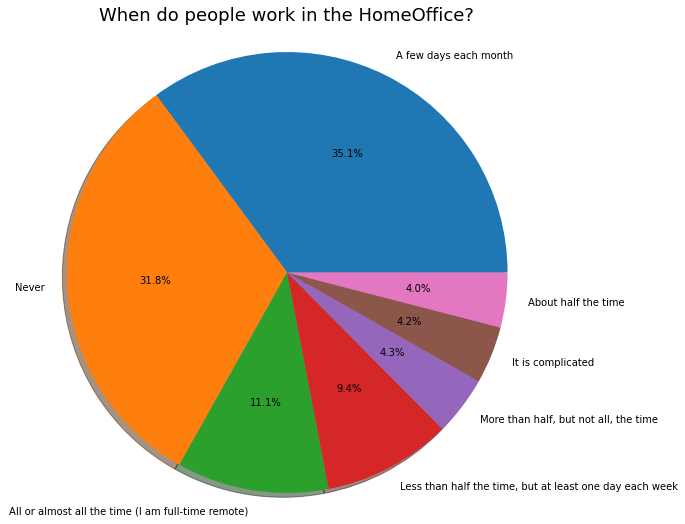

In [16]:
#https://matplotlib.org/stable/gallery/pie_and_polar_charts/pie_features.html
#https://stackoverflow.com/questions/49199164/increasing-pie-chart-size-with-matplotlib-radius-parameter-appears-to-do-nothin

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'A few days each month', 'Never', 'All or almost all the time (I am full-time remote)', 'Less than half the time, but at least one day each week', 'More than half, but not all, the time', 'It is complicated', 'About half the time'
sizes = [df['HomeRemote'].value_counts()[0]/df.shape[0]*100, df['HomeRemote'].value_counts()[1]/df.shape[0]*100, df['HomeRemote'].value_counts()[2]/df.shape[0]*100, df['HomeRemote'].value_counts()[3]/df.shape[0]*100, df['HomeRemote'].value_counts()[4]/df.shape[0]*100, df['HomeRemote'].value_counts()[5]/df.shape[0]*100, df['HomeRemote'].value_counts()[6]/df.shape[0]*100]

fig1, ax1 = plt.subplots(figsize=(10, 9))
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=0)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title("When do people work in the HomeOffice?", fontsize=18);
plt.show()

In the graph you can see that in the data collected 35% only work from home. 32% never work from home. So there is no real tendency here, except that working from home or the office is done in the same way.

### Question 2: Is there a connection between salary and days spent in the home office?

In [10]:
#Drop na Rows of Salary
Sal_cal = df.dropna(subset=['Salary'], axis=0)
Sal_cal.shape

(12883, 154)

To answer the first question, I can only use about 13000 data rows, the rest have no content available.

In [11]:
Sal_cal.groupby(['HomeRemote']).mean()['Salary'].sort_values()

HomeRemote
Never                                                      46862.620192
More than half, but not all, the time                      53829.468074
It's complicated                                           55742.095768
About half the time                                        56568.194664
A few days each month                                      59226.876756
Less than half the time, but at least one day each week    64508.428807
All or almost all the time (I'm full-time remote)          74287.848573
Name: Salary, dtype: float64

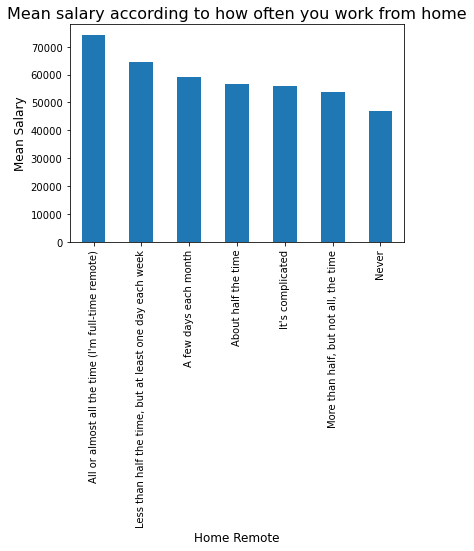

In [12]:
#https://stackoverflow.com/questions/3899980/how-to-change-the-font-size-on-a-matplotlib-plot
#https://www.it-swarm.com.de/de/python/y-achse-pyplot-umkehren/968738380/

(Sal_cal.groupby(['HomeRemote']).mean()['Salary'].sort_values()).plot(kind="bar");
plt.title("Mean salary according to how often you work from home", fontsize=16);
plt.xlabel('Home Remote', fontsize=12)
plt.ylabel('Mean Salary', fontsize=12);
plt.gca().invert_xaxis()

In the graph you can see that home office can increase your salary. You earn the least if you don't do any home office at all and the most if you only do home office. It varies in between. Furthermore, one must not forget that the original data set had 51000 data lines, by sorting out incomplete data the data set has dropped to 12800.

### Question 3: Do you start later if you work more at home?

In [13]:
#Drop na Rows of WorkStart
WS_cal = df.dropna(subset=['WorkStart'], axis=0)
WS_cal.shape

(32364, 154)

To answer the second question, I can only use about 32400 data rows, the rest do not have a weekly hour available.

In [14]:
#https://stackoverflow.com/questions/17679089/pandas-dataframe-groupby-two-columns-and-get-counts

(WS_cal.groupby(['HomeRemote', 'WorkStart']).size() 
   .sort_values(ascending=False) 
   .reset_index(name='count') 
   ).head(15)

,HomeRemote,WorkStart,count
0,A few days each month,10:00 AM,2997
1,A few days each month,9:00 AM,2931
2,Never,9:00 AM,2780
3,Never,10:00 AM,2393
4,A few days each month,8:00 AM,2339
5,Never,8:00 AM,2244
6,A few days each month,7:00 AM,1079
7,Never,7:00 AM,986
8,All or almost all the time (I'm full-time remote),10:00 AM,863
9,All or almost all the time (I'm full-time remote),9:00 AM,840


In the statistics you can see that it doesn't matter whether you work at home or in the office, people prefer to start work between 8-10 am.